# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

## <font color='brown'>오픈데이터 활용</font>

### 재미있는 사이트, Kaggle.com
> URL : https://www.kaggle.com/datasets

#### 데이터분석 미션
>  
> - 과제1 : 남자/여자 수, 객실 등급별 수
> - 과제2 : 연령대별 수 ( 10대 : OO명, 20대 : OO명, 30대 : OO명 )
> - 과제3 : 남여별/객실등급별 생존자수를 그래프로 표현

####  Datasets 
- Data Download :  https://www.kaggle.com/c/titanic/data  → train.csv
- Data Description : 

<table width=100%>
<tbody>
	<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
	<tr>
		<td>survival</td>
		<td>Survival</td>
		<td>0 = No, 1 = Yes</td>
	</tr>
	<tr>
		<td>pclass</td>
		<td>Ticket class</td>
		<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
	</tr>
	<tr>
		<td>sex</td>
		<td>Sex</td>
		<td></td>
	</tr>
	<tr>
		<td>Age</td>
		<td>Age in years</td>
		<td></td>
	</tr>
	<tr>
		<td>sibsp</td>
		<td># of siblings / spouses aboard the Titanic</td>
		<td></td>
	</tr>
	<tr>
		<td>parch</td>
		<td># of parents / children aboard the Titanic</td>
		<td></td>
	</tr>
	<tr>
		<td>ticket</td>
		<td>Ticket number</td>
		<td></td>
	</tr>
	<tr>
		<td>fare</td>
		<td>Passenger fare</td>
		<td></td>
	</tr>
	<tr>
		<td>cabin</td>
		<td>Cabin number</td>
		<td></td>
	</tr>
	<tr>
		<td>embarked</td>
		<td>Port of Embarkation</td>
		<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
	</tr>
</tbody>
</table>


<hr>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

### <font color='brown'>데이터 다운로드 및 분석</font>

In [2]:
df = pd.read_csv("data/kaggle_titanic_train.csv")

In [3]:
df.head(10)         # Pclass: 객실등급, 성별, 나이, 생존 여부

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.groupby("Sex").size()

Sex
female    314
male      577
dtype: int64

In [5]:
df.groupby(["Sex", "Pclass"]).size()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

In [6]:
import math

In [7]:
# df.Age.dropna()
# Return Series without null values

In [8]:
# df.Age.dropna().apply(lambda x:str(x)[:1])

In [9]:
age_series = df.Age.dropna().apply(lambda age: math.floor(age / 10) * 10)
age_series.name = "Age_Group"

In [10]:
age_series[:10]

0     20
1     30
2     20
3     30
4     30
6     50
7      0
8     20
9     10
10     0
Name: Age_Group, dtype: int64

In [11]:
df = pd.concat(
    [df, age_series],
    axis=1,
)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,50.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,20.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10.0


In [12]:
df.Age_Group = df.Age_Group.fillna("Uncategoized")

In [13]:
df.Age_Group.head(10)

0              20
1              30
2              20
3              30
4              30
5    Uncategoized
6              50
7               0
8              20
9              10
Name: Age_Group, dtype: object

In [14]:
df.groupby("Age_Group").size()

Age_Group
0.0              62
10.0            102
20.0            220
30.0            167
40.0             89
50.0             48
60.0             19
70.0              6
80.0              1
Uncategoized    177
dtype: int64

In [15]:
# df.agg : Aggregate using callable, string, dict, or list of string/callables

In [16]:
df.groupby("Pclass").agg({"Survived": "mean"})

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
df.groupby("Sex").agg({"Survived": "mean"})

,Survived
Sex,
female,0.742038
male,0.188908


In [18]:
df.groupby("Sex").agg({"Survived": "sum"})

,Survived
Sex,
female,233
male,109


In [19]:
233/314, 109/577

(0.7420382165605095, 0.18890814558058924)

In [20]:
# 숫자를 센다

In [21]:
# pd.crosstab : Compute a simple cross-tabulation of two (or more) factors.

In [22]:
pd.crosstab(
    df.Sex,
    df.Pclass,
    margins=True,
)  

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


In [23]:
# df.pivot_table : Create a spreadsheet-style pivot table as a DataFrame

In [24]:
df.pivot_table(
    "Survived",
    "Sex",
    "Pclass",     # aggfunc="mean" ( 생존률 ); ( 매출: SUM )
)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### <font color='blue'>참조. <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html'>pandas.DataFrame.unstack()</a></font>

In [25]:
df.groupby(["Pclass", "Sex"]).size().unstack(1)

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [26]:
temp_df = df.groupby(["Pclass", "Sex"]).size().unstack(0)
temp_df

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [27]:
# temp_df.sum(axis=1)
result_df = temp_df.div(temp_df.sum(axis=1), axis=0)
# 비율을 연산하는 과정                .sum() => .div()
result_df

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


In [28]:
# temp_df.div
# Floating division of dataframe and other, element-wise

### <font color='brown'>데이터 시각화</font>

In [29]:
plt.rcParams['figure.figsize'] = (12,6)

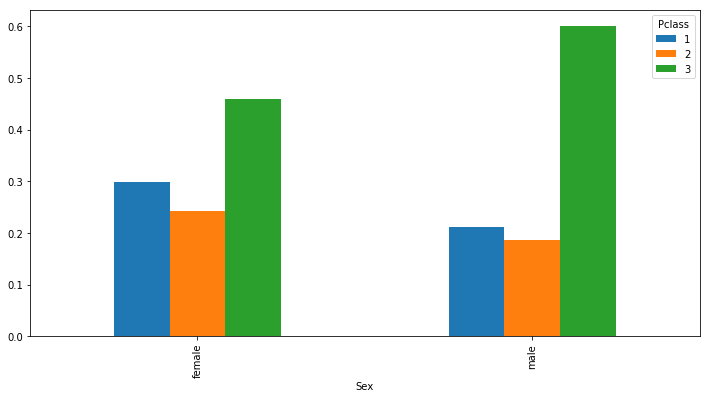

In [30]:
result_df.plot.bar()
# 지원 => Matplotlib API

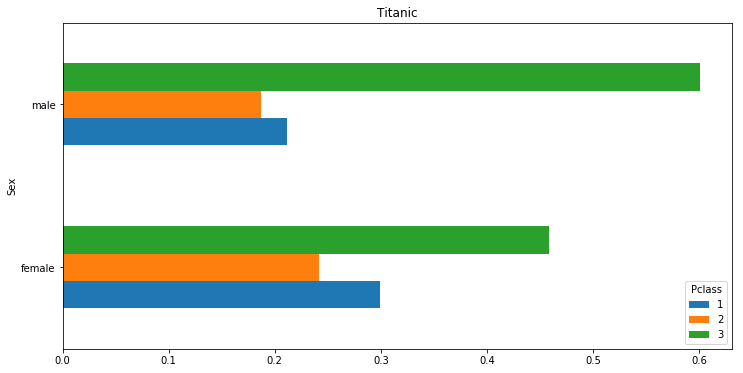

In [31]:
# result_df.plot.bar(title="Titanic")           # 특정kwargs O, X
ax = result_df.plot(kind="barh", title="Titanic")

# DataFrame. plot ( option )

In [32]:
result_df

Pclass,1,2,3
Sex,,,
female,0.299363,0.242038,0.458599
male,0.211438,0.187175,0.601386


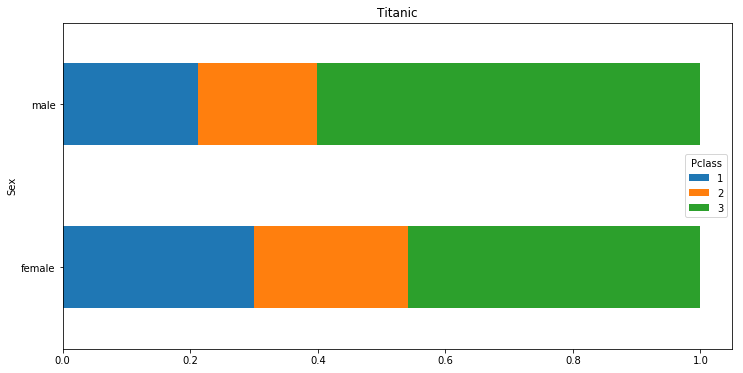

In [33]:
# result_df.plot.bar(title="Titanic")           # 특정kwargs O, X
ax = result_df.plot(kind="barh", title="Titanic", stacked=True)
ax
# DataFrame. plot ( option )
# import seaborn as sns

In [34]:
import matplotlib as mpl
import seaborn as sns

In [37]:
sns.set()

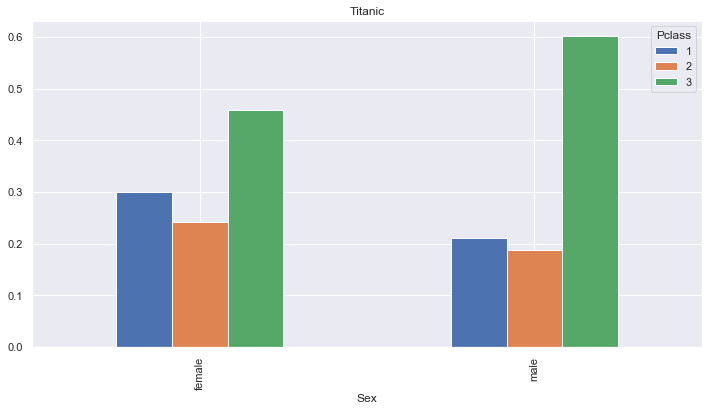

In [38]:
result_df.plot.bar(title="Titanic")           # 특정kwargs O, X

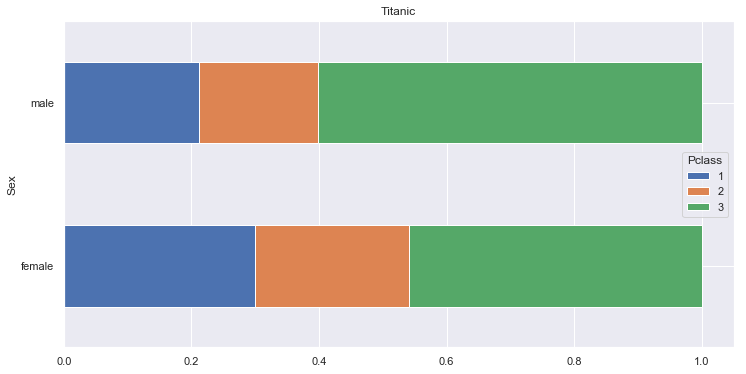

In [39]:
result_df.plot(kind="barh", title="Titanic", stacked=True)

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>